In [9]:
from moviepy.editor import VideoFileClip

# Load your video file
video = VideoFileClip('/home/ginger/code/gderiddershanghai/Team_4_streamlit/Nbs/20240419230123.mp4')

# Clip the first 5 seconds of the video
video_clip = video.subclip(0, 42)

# Crop the video to remove white sidebars.
# Replace the following numbers with the coordinates that correspond to the area you want to crop.
# For instance, if the white sidebar is 50 pixels wide on both sides, you would start at x1=50 and end at x2=width-50.
cropped_clip = video_clip.crop(x1=215, y1=30, x2=video_clip.w-215, y2=-30) # video_clip.h)

# Convert the cropped video clip to a GIF
cropped_clip.write_gif('output_2.gif')


MoviePy - Building file output_2.gif with imageio.


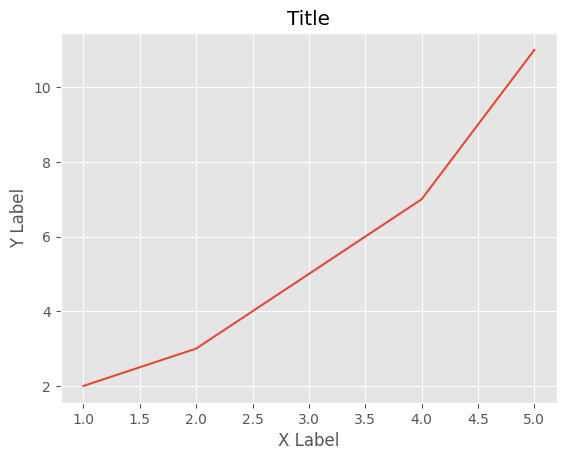

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot(x, y)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Title')
plt.show()


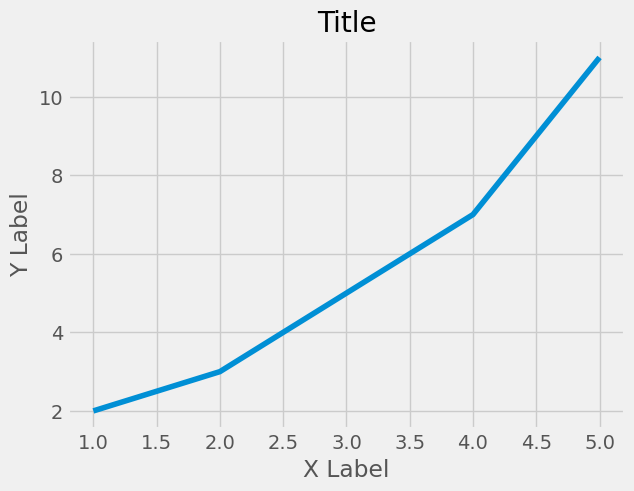

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot(x, y)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Title')
plt.show()

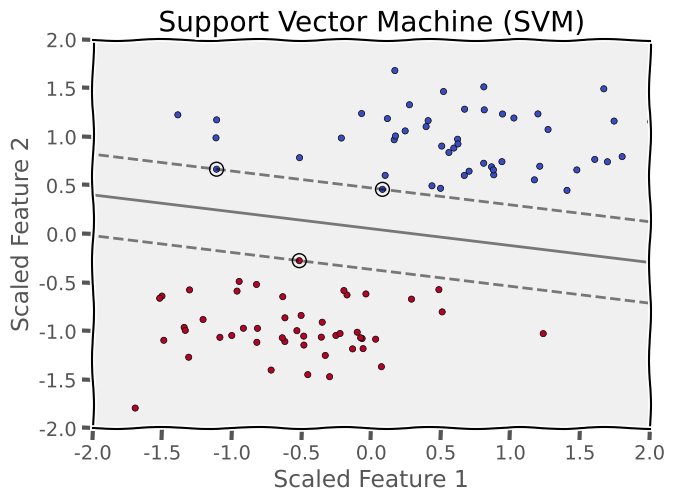

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit SVM
clf = SVC(kernel='linear', C=100)
clf.fit(X_scaled, y)
with plt.xkcd():
    fig, ax = plt.subplots()
    # Scatter plot of points
    scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    # Plot decision boundary
    axx = np.linspace(-2, 2, 400)
    ayy = np.linspace(-2, 2, 400)
    AXX, AYY = np.meshgrid(axx, ayy)
    Z = clf.decision_function(np.c_[AXX.ravel(), AYY.ravel()])
    Z = Z.reshape(AXX.shape)
    ax.contour(AXX, AYY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xlabel('Scaled Feature 1')
    ax.set_ylabel('Scaled Feature 2')
    ax.set_title('Support Vector Machine (SVM)')
    plt.show()


/home/ginger/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


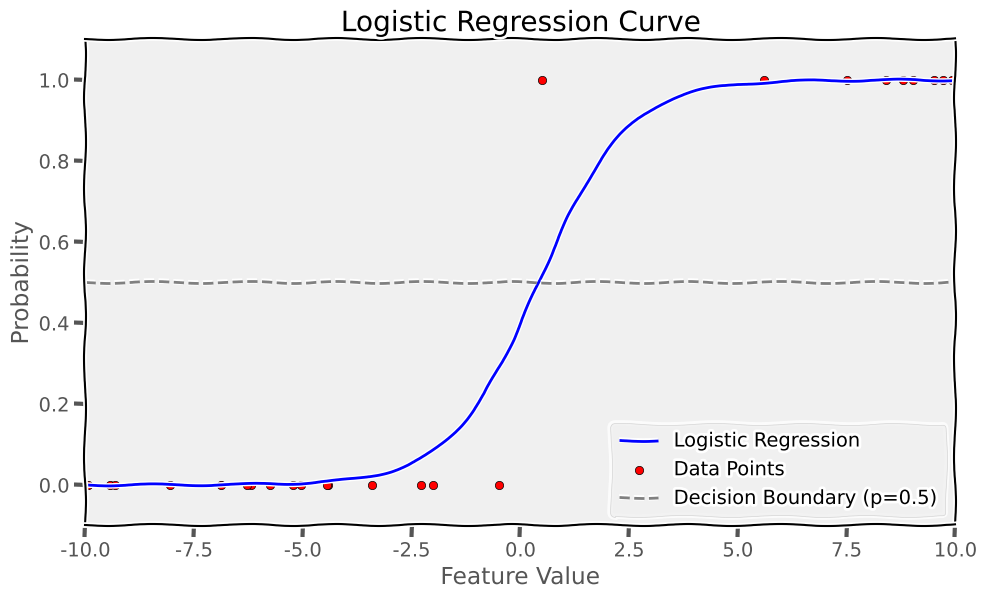

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generating a simple dataset with fewer data points
# Feature values
X = np.linspace(-10, 10, 25).reshape(-1, 1)  # Reduced number of data points
X = np.random.uniform(-10, 10, size=(25, 1))

# Binary targets
Y = np.where(X >= 0, 1, 0)

# Fit Logistic Regression
model = LogisticRegression()
model.fit(X, Y)

# Predict probabilities
X_test = np.linspace(-10, 10, 300).reshape(-1, 1)
probabilities = model.predict_proba(X_test)[:, 1]

# Plotting with XKCD style
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 6))  # Increased figure size
    ax.plot(X_test, probabilities, label='Logistic Regression', color='b')
    ax.scatter(X, Y, edgecolor='k', color='red', label='Data Points')
    ax.axhline(0.5, color='gray', linestyle='--', label='Decision Boundary (p=0.5)')
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-10, 10)
    ax.set_xlabel('Feature Value')
    ax.set_ylabel('Probability')
    ax.set_title('Logistic Regression Curve')
    ax.legend(loc='lower right')  # Moved legend to the bottom right
    plt.show()


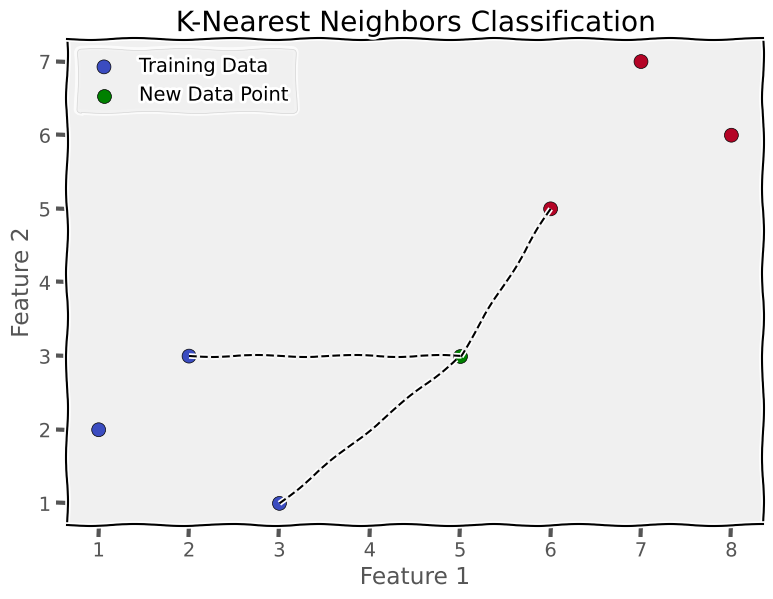

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generating a very simple and spread out dataset
X = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [8, 6]])
y = np.array([0, 0, 0, 1, 1, 1])

# New data point to classify
new_point = np.array([5, 3])

# Fit KNN with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Find neighbors for the new data point
distances, indices = knn.kneighbors([new_point])

# Plotting with XKCD style
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8, 6))
    # Plot existing data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=100, edgecolors='k', label='Training Data')
    # Plot new data point
    ax.scatter(new_point[0], new_point[1], c='green', s=100, edgecolors='k', label='New Data Point')
    # Highlight neighbors
    for i in indices[0]:
        ax.plot([X[i][0], new_point[0]], [X[i][1], new_point[1]], 'k--', linewidth=1.5)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('K-Nearest Neighbors Classification')
    ax.legend()
    plt.show()


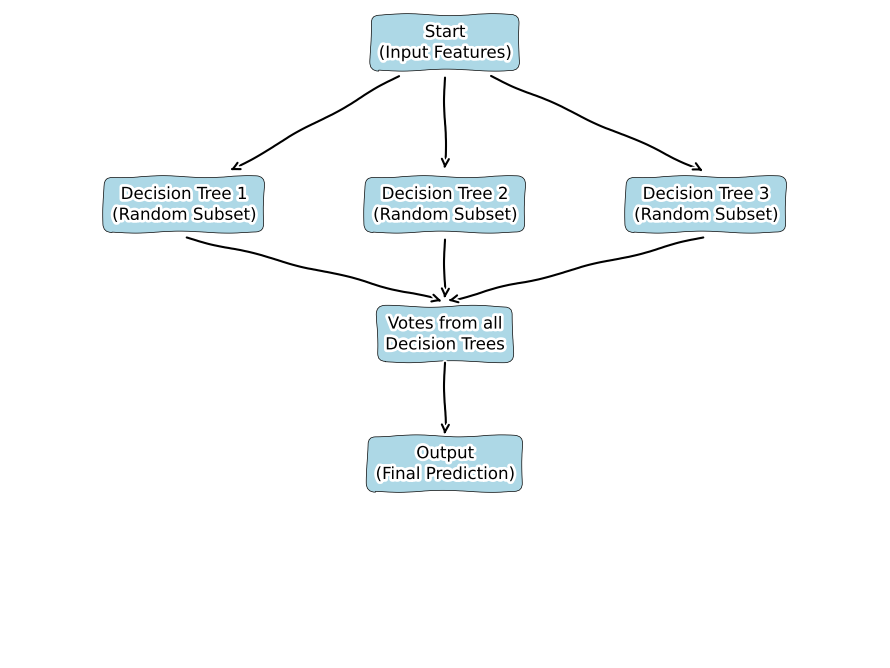

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def draw_arrow(ax, start, end):
    ax.annotate("", xy=end, xycoords='data', xytext=start, textcoords='data',
                arrowprops=dict(arrowstyle="->", lw=1.5, color='black'))

# Setting up the XKCD style
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis('off')

    # Nodes positions and labels
    positions = {
        'Start': (0.5, 0.95),
        'DT1': (0.2, 0.7),
        'DT2': (0.5, 0.7),
        'DT3': (0.8, 0.7),
        'Votes': (0.5, 0.5),
        'Output': (0.5, 0.3)
    }
    labels = {
        'Start': 'Start\n(Input Features)',
        'DT1': 'Decision Tree 1\n(Random Subset)',
        'DT2': 'Decision Tree 2\n(Random Subset)',
        'DT3': 'Decision Tree 3\n(Random Subset)',
        'Votes': 'Votes from all\nDecision Trees',
        'Output': 'Output\n(Final Prediction)'
    }

    # Draw nodes
    for key, (x, y) in positions.items():
        ax.text(x, y, labels[key], fontsize=12, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', edgecolor='black'))

    # Draw arrows
    draw_arrow(ax, (positions['Start'][0]-0.05,positions['Start'][1]-0.05), (positions['DT1'][0]+ 0.05, positions['DT1'][1] + 0.05))
    draw_arrow(ax, (positions['Start'][0],positions['Start'][1]-0.05), (positions['DT2'][0], positions['DT2'][1] + 0.05))
    draw_arrow(ax, (positions['Start'][0]+0.05,positions['Start'][1]-0.05), (positions['DT3'][0], positions['DT3'][1] + 0.05))
    draw_arrow(ax, (positions['DT1'][0], positions['DT1'][1] - 0.05), (positions['Votes'][0],positions['Votes'][1]+ 0.05))
    draw_arrow(ax, (positions['DT2'][0], positions['DT2'][1] - 0.05), (positions['Votes'][0],positions['Votes'][1]+ 0.05))
    draw_arrow(ax, (positions['DT3'][0], positions['DT3'][1] - 0.05), (positions['Votes'][0],positions['Votes'][1]+ 0.05))
    draw_arrow(ax, (positions['Votes'][0],positions['Votes'][1]- 0.04 ),(positions['Output'][0],positions['Output'][1] +0.04))

    plt.show()


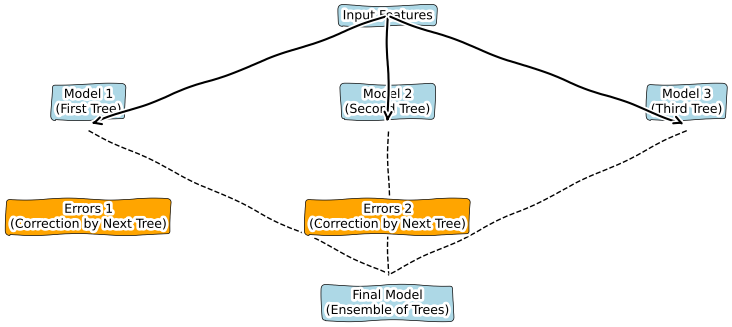

In [85]:
import matplotlib.pyplot as plt

def draw_arrow(ax, start, end):
    ax.annotate("", xy=end, xycoords='data', textcoords='data',
                xytext=start, arrowprops=dict(arrowstyle="->", lw=1.5, color='black'))

# XKCD style
with plt.xkcd():
    # Set up figure
    fig, ax = plt.subplots(figsize=(7, 2))  # More compact figure size
    ax.axis('off')

    # Node positions and labels
    positions = {
        'Input': (0.5, 0.9),
        'Tree1': (0.2, 0.75),
        'Error1': (0.2, 0.55),
        'Tree2': (0.5, 0.75),
        'Error2': (0.5, 0.55),
        'Tree3': (0.8, 0.75),
        'FinalModel': (0.5, 0.4)
    }
    labels = {
        'Input': 'Input Features',
        'Tree1': 'Model 1\n(First Tree)',
        'Error1': 'Errors 1\n(Correction by Next Tree)',
        'Tree2': 'Model 2\n(Second Tree)',
        'Error2': 'Errors 2\n(Correction by Next Tree)',
        'Tree3': 'Model 3\n(Third Tree)',
        'FinalModel': 'Final Model\n(Ensemble of Trees)'
    }

    # Draw nodes with different styles
    for key, (x, y) in positions.items():
        bbox_props = dict(boxstyle='round,pad=0.3', facecolor='lightblue', edgecolor='black') if 'Error' not in key else \
                     dict(boxstyle='round,pad=0.3', facecolor='orange', edgecolor='black')
        ax.text(x, y, labels[key], fontsize=9, ha='center', va='center', bbox=bbox_props)

    # Draw arrows
    for tree_key in ['Tree1', 'Tree2', 'Tree3']:
        if tree_key=='Tree1':
            draw_arrow(ax, positions['Input'], (positions[tree_key][0], positions[tree_key][1] - 0.04))
        if tree_key=='Tree2':
            draw_arrow(ax, positions['Input'], (positions[tree_key][0], positions[tree_key][1] - 0.04))
        if tree_key=='Tree3':
            draw_arrow(ax, positions['Input'], (positions[tree_key][0], positions[tree_key][1] - 0.04))
        if 'Error' in tree_key:
            draw_arrow(ax, positions[tree_key], (positions[tree_key][0], positions['FinalModel'][1] + 1.05))

    # Draw connecting lines to final model
    for tree_key in ['Tree1', 'Tree2', 'Tree3']:
        ax.plot([positions[tree_key][0], positions['FinalModel'][0]], [positions[tree_key][1] - 0.05, positions['FinalModel'][1] + 0.05], 'k--', lw=1)

    # Adjust layout to minimize white space
    plt.tight_layout()
    plt.show()


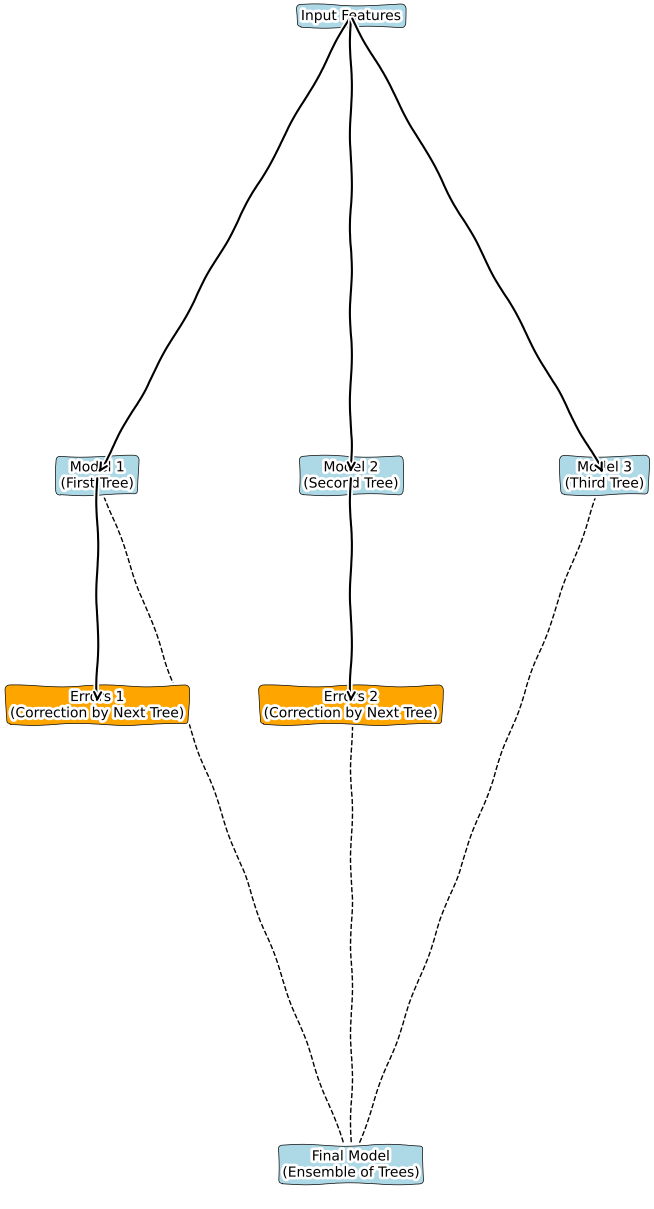

In [86]:
import matplotlib.pyplot as plt

def draw_arrow(ax, start, end):
    # The start and end parameters are tuples of (x, y) coordinates
    ax.annotate("", xy=end, xytext=start,
                arrowprops=dict(arrowstyle="->", lw=1.5, color='black'))

# Setting up the XKCD style
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 8))  # Change figure dimensions as needed
    ax.axis('off')

    # Node positions and labels
    positions = {
        # Move these (x, y) positions to adjust where the boxes appear on the canvas
        'Input': (0.5, 0.8),
        'Tree1': (0.2, 0.6),  # To move Tree1 box, adjust (x, y)
        'Error1': (0.2, 0.5),  # To move Error1 box, adjust (x, y)
        'Tree2': (0.5, 0.6),
        'Error2': (0.5, 0.5),
        'Tree3': (0.8, 0.6),
        'FinalModel': (0.5, 0.3)  # To move FinalModel box, adjust (x, y)
    }
    labels = {
        'Input': 'Input Features',
        'Tree1': 'Model 1\n(First Tree)',
        'Error1': 'Errors 1\n(Correction by Next Tree)',
        'Tree2': 'Model 2\n(Second Tree)',
        'Error2': 'Errors 2\n(Correction by Next Tree)',
        'Tree3': 'Model 3\n(Third Tree)',
        'FinalModel': 'Final Model\n(Ensemble of Trees)'
    }

    # Draw nodes
    for key, (x, y) in positions.items():
        bbox_props = dict(boxstyle='round,pad=0.3', facecolor='lightblue', edgecolor='black') if 'Error' not in key else \
                     dict(boxstyle='round,pad=0.3', facecolor='orange', edgecolor='black')
        ax.text(x, y, labels[key], fontsize=10, ha='center', va='center', bbox=bbox_props)

    # Draw arrows
    for tree_key in ['Tree1', 'Tree2', 'Tree3']:
        draw_arrow(ax, positions['Input'], (positions[tree_key][0], positions[tree_key][1]))
        # To adjust arrow length, modify the end point closer or further from the node

    # Directly draw the arrows to the errors for clarity
    draw_arrow(ax, positions['Tree1'], positions['Error1'])
    draw_arrow(ax, positions['Tree2'], positions['Error2'])

    # Connecting trees to the final model with dashed lines
    # To adjust these lines, change the points they connect
    ax.plot([positions['Tree1'][0], positions['FinalModel'][0]], [positions['Tree1'][1], positions['FinalModel'][1]], 'k--', lw=1)
    ax.plot([positions['Tree2'][0], positions['FinalModel'][0]], [positions['Tree2'][1], positions['FinalModel'][1]], 'k--', lw=1)
    ax.plot([positions['Tree3'][0], positions['FinalModel'][0]], [positions['Tree3'][1], positions['FinalModel'][1]], 'k--', lw=1)

    plt.tight_layout()
    plt.show()


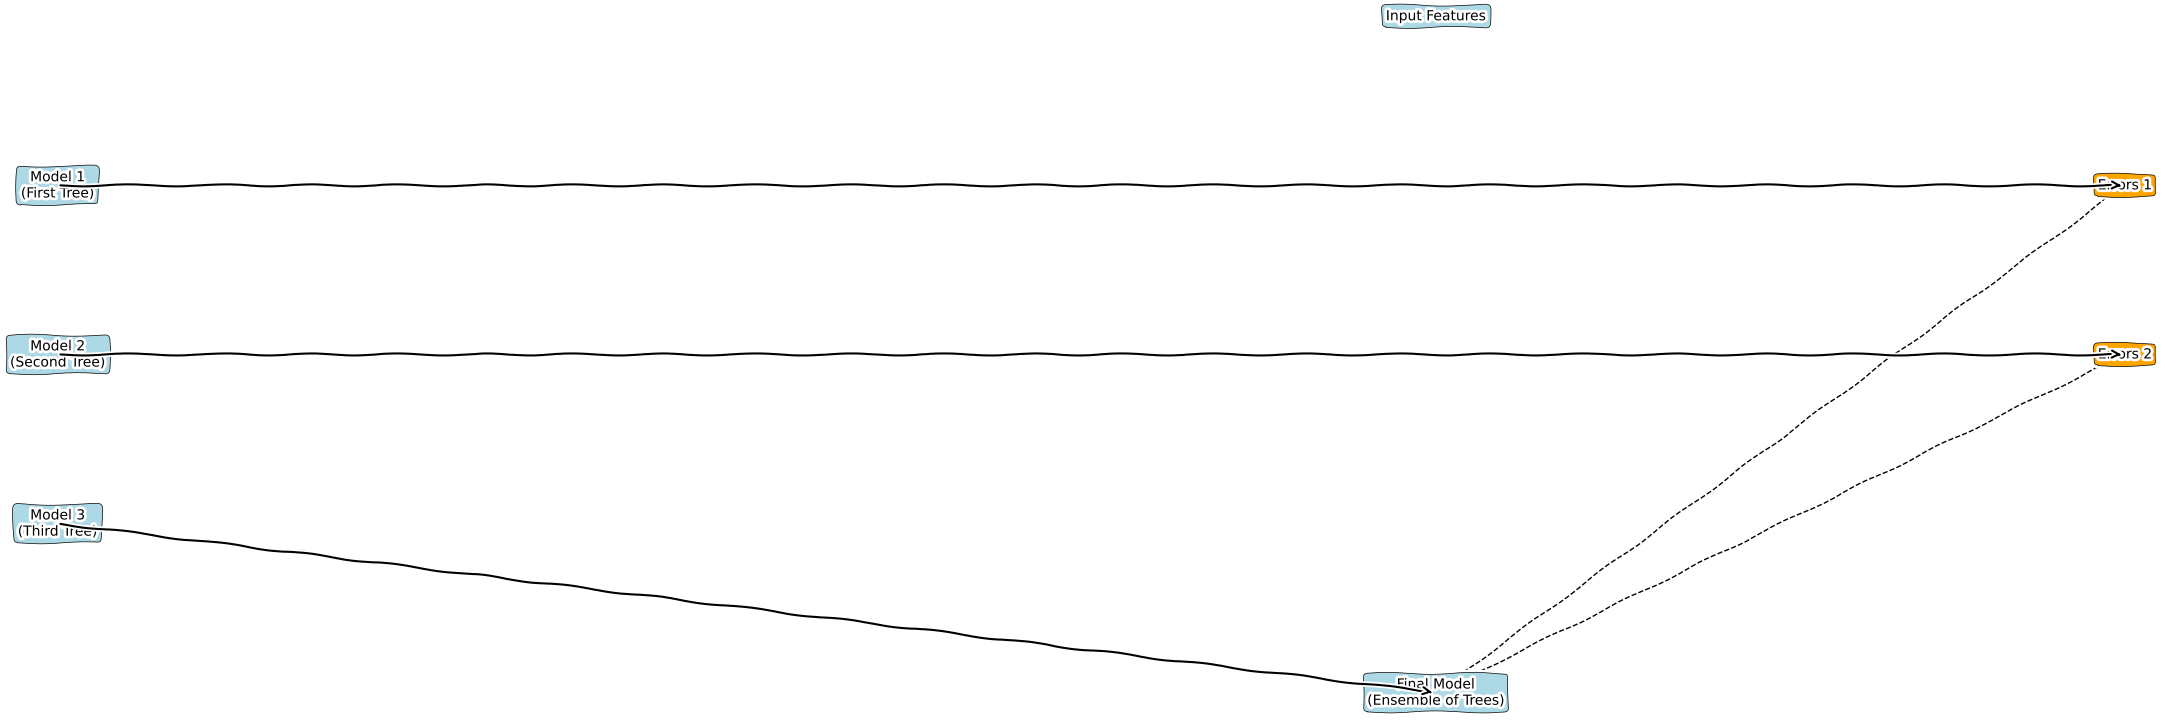

In [88]:
import matplotlib.pyplot as plt

def draw_arrow(ax, start, end):
    ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle="->", lw=1.5, color='black'))

# Setting up the XKCD style
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted for a wider figure
    ax.axis('off')

    # Node positions and labels
    positions = {
        'Input': (0.5, 0.9),
        'Tree1': (0.3, 0.7),
        'Error1': (0.6, 0.7),  # Placed to the right of Tree1
        'Tree2': (0.3, 0.5),
        'Error2': (0.6, 0.5),  # Placed to the right of Tree2
        'Tree3': (0.3, 0.3),
        'FinalModel': (0.5, 0.1)  # Central position at the bottom
    }
    labels = {
        'Input': 'Input Features',
        'Tree1': 'Model 1\n(First Tree)',
        'Error1': 'Errors 1',
        'Tree2': 'Model 2\n(Second Tree)',
        'Error2': 'Errors 2',
        'Tree3': 'Model 3\n(Third Tree)',
        'FinalModel': 'Final Model\n(Ensemble of Trees)'
    }

    # Draw nodes
    for key, (x, y) in positions.items():
        facecolor = 'orange' if 'Error' in key else 'lightblue'
        ax.text(x, y, labels[key], fontsize=10, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor=facecolor, edgecolor='black'))

    # Draw arrows for trees to errors
    draw_arrow(ax, positions['Tree1'], positions['Error1'])
    draw_arrow(ax, positions['Tree2'], positions['Error2'])

    # Draw arrows from input to trees and from trees to final model
    draw_arrow(ax, positions['Input'], positions['Tree1'])
    draw_arrow(ax, positions['Input'], positions['Tree2'])
    draw_arrow(ax, positions['Input'], positions['Tree3'])
    draw_arrow(ax, positions['Tree1'], positions['Tree2'])
    draw_arrow(ax, positions['Tree2'], positions['Tree3'])
    draw_arrow(ax, positions['Tree3'], positions['FinalModel'])

    # Draw a line connecting errors to the final model
    ax.plot([positions['Error1'][0], positions['FinalModel'][0]], [positions['Error1'][1], positions['FinalModel'][1]], 'k--', lw=1)
    ax.plot([positions['Error2'][0], positions['FinalModel'][0]], [positions['Error2'][1], positions['FinalModel'][1]], 'k--', lw=1)

    plt.tight_layout()
    plt.show()


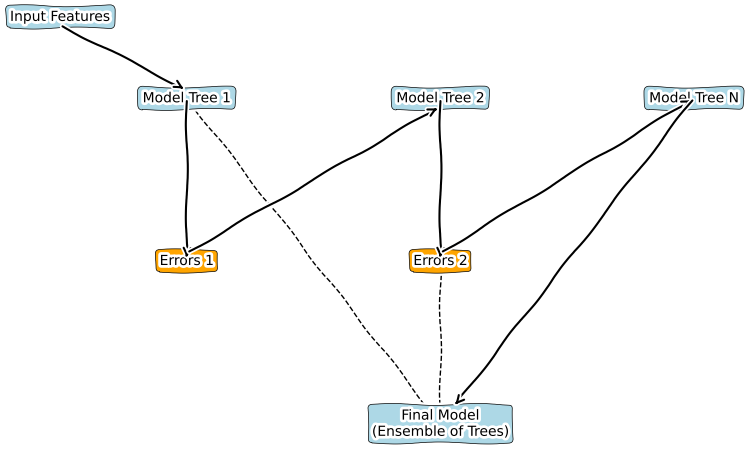

In [115]:
import matplotlib.pyplot as plt

def draw_arrow(ax, start, end):
    ax.annotate("", xy=end, xycoords='data', textcoords='data',
                xytext=start, arrowprops=dict(arrowstyle="->", lw=1.5, color='black'))

# XKCD style
with plt.xkcd():
    # Set up figure
    fig, ax = plt.subplots(figsize=(6, 4))  # More compact figure size
    ax.axis('off')

    # Node positions and labels
    positions = {
        'Input': (0.15, 0.7),
        'Tree1': (0.3-0.05, 0.6),
        'Error1': (0.3-0.05, 0.4),
        'Tree2': (0.5-0.05, 0.6),
        'Error2': (0.5-0.05, 0.4),
        'Tree3': (0.7-0.05, 0.6),
        'FinalModel': (0.5-0.05, 0.2)
    }
    labels = {
        'Input': 'Input Features',
        'Tree1': 'Model Tree 1',
        'Error1': 'Errors 1',
        'Tree2': 'Model Tree 2',
        'Error2': 'Errors 2',
        'Tree3': 'Model Tree N',
        'FinalModel': 'Final Model\n(Ensemble of Trees)'
    }

    # Draw nodes with different styles
    for key, (x, y) in positions.items():
        bbox_props = dict(boxstyle='round,pad=0.3', facecolor='lightblue', edgecolor='black') if 'Error' not in key else \
                     dict(boxstyle='round,pad=0.3', facecolor='orange', edgecolor='black')
        ax.text(x, y, labels[key], fontsize=10, ha='center', va='center', bbox=bbox_props)

    # Draw arrows
    draw_arrow(ax, (positions['Input'][0],positions['Input'][1]-0.01), (positions['Tree1'][0],positions['Tree1'][1]+0.01))
    draw_arrow(ax, positions['Tree1'], positions['Error1'])
    draw_arrow(ax, (positions['Error1'][0],positions['Error1'][1]+0.01), (positions['Tree2'][0],positions['Tree2'][1]-0.01))
    draw_arrow(ax, positions['Tree2'], positions['Error2'])
    draw_arrow(ax, (positions['Error2'][0],positions['Error2'][1]+0.01), positions['Tree3'])
    draw_arrow(ax, positions['Tree3'], (positions['FinalModel'][0]+0.01,positions['FinalModel'][1]+0.02))

    # Draw connecting lines to final model
    ax.plot([positions['Tree1'][0], positions['FinalModel'][0]], [positions['Tree1'][1], positions['FinalModel'][1]], 'k--', lw=1)
    ax.plot([positions['Tree2'][0], positions['FinalModel'][0]], [positions['Tree2'][1], positions['FinalModel'][1]], 'k--', lw=1)
    ax.plot([positions['Tree3'][0], positions['FinalModel'][0]], [positions['Tree3'][1], positions['FinalModel'][1]], 'k--', lw=1)

    # Adjust layout to minimize white space
    plt.tight_layout()
    plt.show()

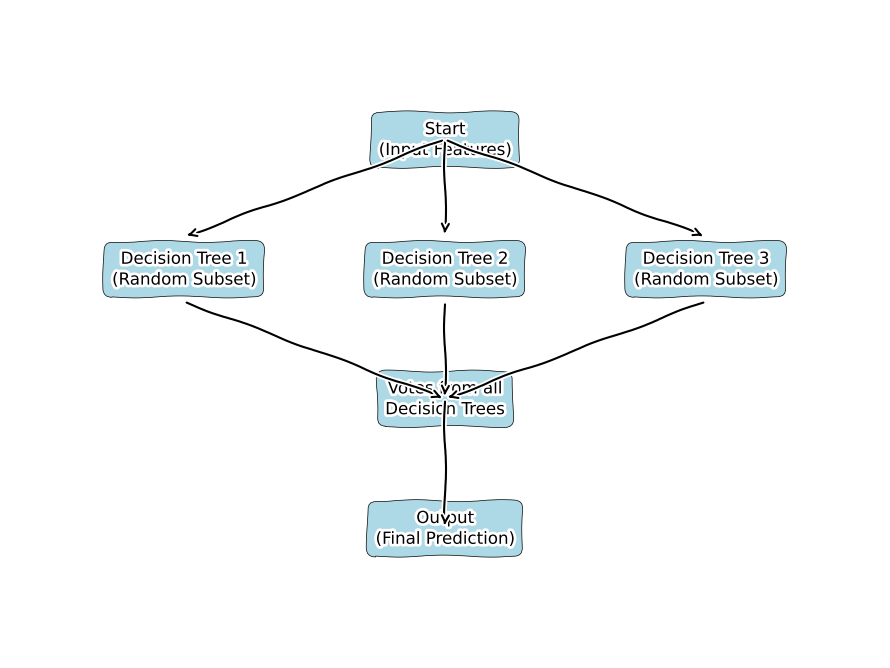

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def draw_arrow(ax, start, end):
    ax.annotate("", xy=end, xycoords='data', xytext=start, textcoords='data',
                arrowprops=dict(arrowstyle="->", lw=1.5, color='black'))

# Setting up the XKCD style
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis('off')

    # Nodes positions and labels
    positions = {
        'Start': (0.5, 0.8),
        'DT1': (0.2, 0.6),
        'DT2': (0.5, 0.6),
        'DT3': (0.8, 0.6),
        'Votes': (0.5, 0.4),
        'Output': (0.5, 0.2)
    }
    labels = {
        'Start': 'Start\n(Input Features)',
        'DT1': 'Decision Tree 1\n(Random Subset)',
        'DT2': 'Decision Tree 2\n(Random Subset)',
        'DT3': 'Decision Tree 3\n(Random Subset)',
        'Votes': 'Votes from all\nDecision Trees',
        'Output': 'Output\n(Final Prediction)'
    }

    # Draw nodes
    for key, (x, y) in positions.items():
        ax.text(x, y, labels[key], fontsize=12, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', edgecolor='black'))

    # Draw arrows
    draw_arrow(ax, positions['Start'], (positions['DT1'][0], positions['DT1'][1] + 0.05))
    draw_arrow(ax, positions['Start'], (positions['DT2'][0], positions['DT2'][1] + 0.05))
    draw_arrow(ax, positions['Start'], (positions['DT3'][0], positions['DT3'][1] + 0.05))
    draw_arrow(ax, (positions['DT1'][0], positions['DT1'][1] - 0.05), positions['Votes'])
    draw_arrow(ax, (positions['DT2'][0], positions['DT2'][1] - 0.05), positions['Votes'])
    draw_arrow(ax, (positions['DT3'][0], positions['DT3'][1] - 0.05), positions['Votes'])
    draw_arrow(ax, positions['Votes'], positions['Output'])

    plt.show()


/tmp/ipykernel_27647/2689946548.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((0.1, 0), 0.8, 5, color="orange", label="Majority class", edgecolor="black"))
/tmp/ipykernel_27647/2689946548.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((1.1, 0), 0.8, 1, color="skyblue", label="Minority class", edgecolor="black"))
/tmp/ipykernel_27647/2689946548.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((2.5, 0), 0.8, 5, color="skyblue", edgecolor="black"))
/tmp/ipykernel_27647/2689946548.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((3.5, 0), 0.8, 5, color="orange", edgecolor="black"))
/tmp/ipykernel_27647/2689946548.py:39: UserWarning: Setting the 'color' property w

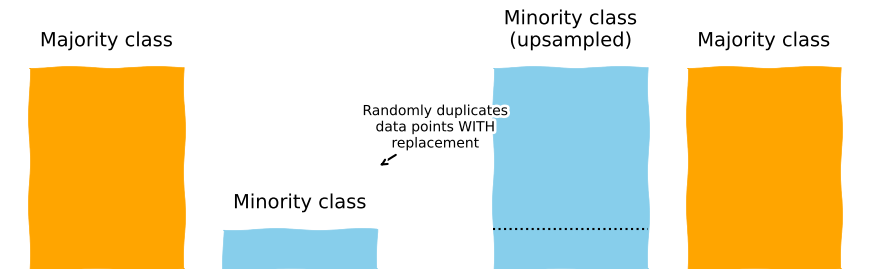

In [133]:
import matplotlib.pyplot as plt

# Using XKCD style for a comic-like appearance
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 3))  # Width x Height
    ax.axis('off')  # No axes for a clean look

    # Drawing rectangles for majority and minority classes
    # Majority class before upsampling
    ax.add_patch(plt.Rectangle((0.1, 0), 0.8, 5, color="orange", label="Majority class", edgecolor="black"))
    ax.text(0.5, 5.5, "Majority class", ha='center')

    # Minority class before upsampling
    ax.add_patch(plt.Rectangle((1.1, 0), 0.8, 1, color="skyblue", label="Minority class", edgecolor="black"))
    ax.text(1.5, 1.5, "Minority class", ha='center')

    # Arrow representing random upsampling
# Arrow representing random upsampling
    ax.annotate('Randomly duplicates\ndata points WITH\nreplacement',
                xy=(1.9, 2.5), xytext=(2.2, 3),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='black'),
                ha='center', fontsize=10)  # Adjust fontsize as needed


    # Minority class after upsampling
    ax.add_patch(plt.Rectangle((2.5, 0), 0.8, 5, color="skyblue", edgecolor="black"))
    ax.text(2.9, 5.5, "Minority class\n(upsampled)", ha='center')

    # Majority class remains the same
    ax.add_patch(plt.Rectangle((3.5, 0), 0.8, 5, color="orange", edgecolor="black"))
    ax.text(3.9, 5.5, "Majority class", ha='center')

    # Adjusting limits and removing axes
    ax.set_xlim(0, 4.5)
    ax.set_ylim(0, 6)
    # ... [previous code to draw the bars]

    # Minority class after upsampling
    ax.add_patch(plt.Rectangle((2.5, 0), 0.8, 5, color="skyblue", edgecolor="black"))
    ax.text(2.9, 5.5, "Minority class\n(upsampled)", ha='center')

    # Add a dotted line at the original height of the minority class after upsampling
    ax.hlines(y=1, xmin=2.5, xmax=3.3, colors='black', linestyles='dotted', lw=1.5)

    # ... [rest of the code]

    plt.show()


/tmp/ipykernel_27647/572327272.py:10: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((0.3, 0), 0.8, 5, color="orange", label="Majority class", edgecolor="black"))
/tmp/ipykernel_27647/572327272.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((1.5, 0), 0.8, 1, color="skyblue", label="Minority class", edgecolor="black"))
/tmp/ipykernel_27647/572327272.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((3.5, 0), 0.8, 5, color="skyblue", edgecolor="black"))
/tmp/ipykernel_27647/572327272.py:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((4.7, 0), 0.8, 5, color="orange", edgecolor="black"))


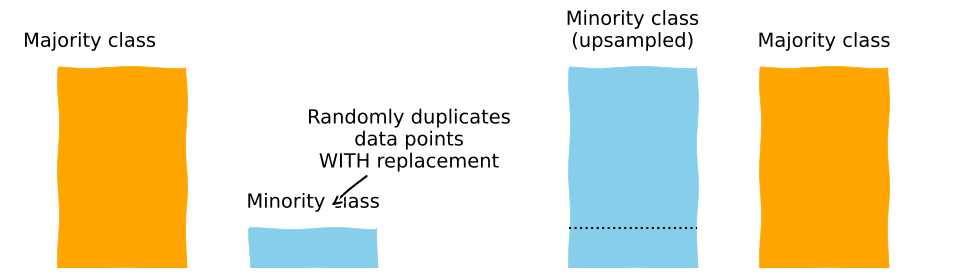

In [137]:
import matplotlib.pyplot as plt

# Using XKCD style for a comic-like appearance
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 3))  # Width x Height
    ax.axis('off')  # No axes for a clean look

    # Drawing rectangles for majority and minority classes
    # Majority class before upsampling
    ax.add_patch(plt.Rectangle((0.3, 0), 0.8, 5, color="orange", label="Majority class", edgecolor="black"))
    ax.text(0.5, 5.5, "Majority class", ha='center')

    # Minority class before upsampling
    ax.add_patch(plt.Rectangle((1.5, 0), 0.8, 1, color="skyblue", label="Minority class", edgecolor="black"))
    ax.text(1.9, 1.5, "Minority class", ha='center')

    # Arrow representing random upsampling
    # Adjust the xytext to change where the text appears in relation to the arrow
    ax.annotate('Randomly duplicates\ndata points\nWITH replacement',
                xy=(2, 1.5), xytext=(2.5, 2.5),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='black'), ha='center')

    # Minority class after upsampling
    # Increase the x position to 3.5 to add more space between the bars
    ax.add_patch(plt.Rectangle((3.5, 0), 0.8, 5, color="skyblue", edgecolor="black"))
    ax.text(3.9, 5.5, "Minority class\n(upsampled)", ha='center')
    # Add a dotted line at the original height of the minority class after upsampling
    ax.hlines(y=1, xmin=3.5, xmax=4.3, colors='black', linestyles='dotted', lw=1.5)

    # Majority class remains the same
    ax.add_patch(plt.Rectangle((4.7, 0), 0.8, 5, color="orange", edgecolor="black"))
    ax.text(5.1, 5.5, "Majority class", ha='center')

    # Adjusting limits and removing axes
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_27647/3677667440.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((0.2, 0), 0.8, 5, color="orange", label="Majority class", edgecolor="black"))
/tmp/ipykernel_27647/3677667440.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((1.5, 0), 0.8, 1, color="skyblue", label="Minority class", edgecolor="black"))
/tmp/ipykernel_27647/3677667440.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((3.5, 0), 0.8, 5, color="skyblue", edgecolor="black"))
/tmp/ipykernel_27647/3677667440.py:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((4.7, 0), 0.8, 5, color="orange", edgecolor="black"))


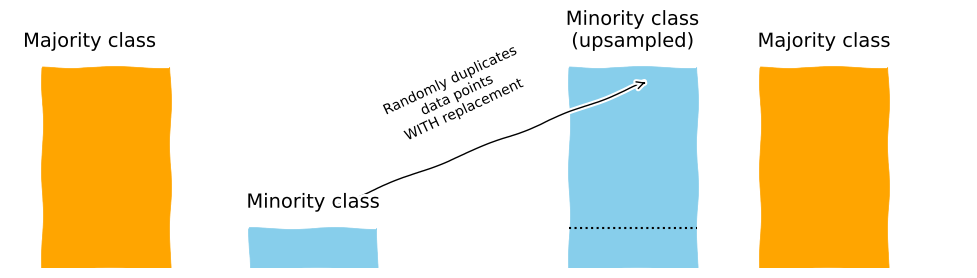

In [180]:
import matplotlib.pyplot as plt
def draw_arrow(ax, start, end):
    ax.annotate("", xy=end, xycoords='data', xytext=start, textcoords='data',
                arrowprops=dict(arrowstyle="->", lw=1., color='black'))
# Using XKCD style for a comic-like appearance
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 3))  # Width x Height
    ax.axis('off')  # No axes for a clean look

    # Drawing rectangles for majority and minority classes
    # Majority class before upsampling
    ax.add_patch(plt.Rectangle((0.2, 0), 0.8, 5, color="orange", label="Majority class", edgecolor="black"))

    # Minority class before upsampling
    ax.add_patch(plt.Rectangle((1.5, 0), 0.8, 1, color="skyblue", label="Minority class", edgecolor="black"))

    # Arrow representing random upsampling
    ax.annotate('Randomly duplicates\ndata points\nWITH replacement',
                xy=(2.8, 4.3), xytext=(2.8, 4.3),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='black'),
                ha='center', va='center', rotation=25, fontsize=10)  # Slanted text

    draw_arrow(ax, (2., 1.5), (4.,4.65))

    # Minority class after upsampling
    ax.add_patch(plt.Rectangle((3.5, 0), 0.8, 5, color="skyblue", edgecolor="black"))
    # Add a dotted line at the original height of the minority class after upsampling
    ax.hlines(y=1, xmin=3.5, xmax=4.3, colors='black', linestyles='dotted', lw=1.5)

    # Majority class remains the same
    ax.add_patch(plt.Rectangle((4.7, 0), 0.8, 5, color="orange", edgecolor="black"))

    # Adjusting limits and removing axes
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)

    # Add labels for the classes
    ax.text(0.5, 5.5, "Majority class", ha='center')
    ax.text(1.9, 1.5, "Minority class", ha='center')
    ax.text(3.9, 5.5, "Minority class\n(upsampled)", ha='center')
    ax.text(5.1, 5.5, "Majority class", ha='center')

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_27647/2819139339.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((0.2, 0), 0.8, 5, color="orange", label="Majority class", edgecolor="black"))
/tmp/ipykernel_27647/2819139339.py:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((1.5, 0), 0.8, 1, color="skyblue", label="Minority class", edgecolor="black"))
/tmp/ipykernel_27647/2819139339.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((3.5, 0), 0.8, 5, color="skyblue", edgecolor="black"))
/tmp/ipykernel_27647/2819139339.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((4.7, 0), 0.8, 5, color="orange", edgecolor="black"))


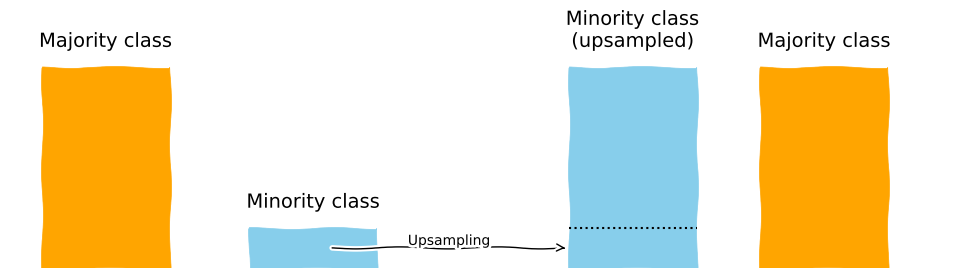

In [181]:
import matplotlib.pyplot as plt

# Define a function to draw arrows
def draw_arrow(ax, start, end):
    ax.annotate("", xy=end, xytext=start,
                arrowprops=dict(arrowstyle="->", lw=1., color='black'))

# Using XKCD style for a comic-like appearance
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 3))  # Width x Height
    ax.axis('off')  # No axes for a clean look

    # Drawing rectangles for majority and minority classes
    # Majority class before upsampling
    ax.add_patch(plt.Rectangle((0.2, 0), 0.8, 5, color="orange", label="Majority class", edgecolor="black"))

    # Minority class before upsampling
    ax.add_patch(plt.Rectangle((1.5, 0), 0.8, 1, color="skyblue", label="Minority class", edgecolor="black"))

    # Arrow and text representing random upsampling
    draw_arrow(ax, (2., 0.5), (3.5, 0.5))  # Draw arrow from minority to upsampled minority
    ax.text(2.75, 0.5, 'Upsampling', ha='center', va='bottom', fontsize=10)

    # Minority class after upsampling (upsampled to the same size as the majority class for visual effect)
    ax.add_patch(plt.Rectangle((3.5, 0), 0.8, 5, color="skyblue", edgecolor="black"))
    # Add a dotted line at the original height of the minority class after upsampling
    ax.hlines(y=1, xmin=3.5, xmax=4.3, colors='black', linestyles='dotted', lw=1.5)

    # Majority class remains the same
    ax.add_patch(plt.Rectangle((4.7, 0), 0.8, 5, color="orange", edgecolor="black"))

    # Adjusting limits and removing axes
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)

    # Add labels for the classes
    ax.text(0.6, 5.5, "Majority class", ha='center')
    ax.text(1.9, 1.5, "Minority class", ha='center')
    ax.text(3.9, 5.5, "Minority class\n(upsampled)", ha='center')
    ax.text(5.1, 5.5, "Majority class", ha='center')

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_27647/408411656.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((1.5, 0), 0.8, 5, color="orange", label="Majority class", edgecolor="black"))
/tmp/ipykernel_27647/408411656.py:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((0.2, 0), 0.8, 5, color="skyblue", label="Minority class", edgecolor="black"))
/tmp/ipykernel_27647/408411656.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((4.7, 0), 0.8, 1, color="skyblue", edgecolor="black"))
/tmp/ipykernel_27647/408411656.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((3.5, 0), 0.8, 1, color="orange", edgecolor="black"))


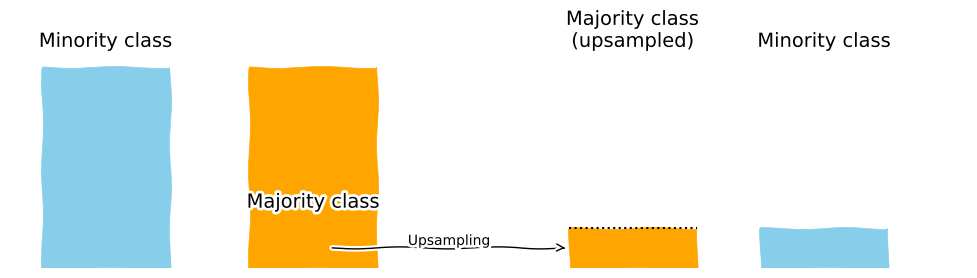

In [193]:
import matplotlib.pyplot as plt

# Define a function to draw arrows
def draw_arrow(ax, start, end):
    ax.annotate("", xy=end, xytext=start,
                arrowprops=dict(arrowstyle="->", lw=1., color='black'))

# Using XKCD style for a comic-like appearance
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 3))  # Width x Height
    ax.axis('off')  # No axes for a clean look

    # Drawing rectangles for majority and minority classes
    # Majority class before upsampling
    ax.add_patch(plt.Rectangle((1.5, 0), 0.8, 5, color="orange", label="Majority class", edgecolor="black"))

    # Minority class before upsampling
    ax.add_patch(plt.Rectangle((0.2, 0), 0.8, 5, color="skyblue", label="Minority class", edgecolor="black"))

    # Arrow and text representing random upsampling
    draw_arrow(ax, (2., 0.5), (3.5, 0.5))  # Draw arrow from minority to upsampled minority
    ax.text(2.75, 0.5, 'Downsampling', ha='center', va='bottom', fontsize=10)

    # Minority class after upsampling (upsampled to the same size as the majority class for visual effect)
    ax.add_patch(plt.Rectangle((4.7, 0), 0.8, 1, color="skyblue", edgecolor="black"))
    # Add a dotted line at the original height of the minority class after upsampling
    ax.hlines(y=1, xmin=3.5, xmax=4.3, colors='black', linestyles='dotted', lw=1.5)

    # Majority class remains the same
    ax.add_patch(plt.Rectangle((3.5, 0), 0.8, 1, color="orange", edgecolor="black"))

    # Adjusting limits and removing axes
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)

    # Add labels for the classes
    ax.text(0.6, 5.5, "Minority class", ha='center')
    ax.text(1.9, 1.5, "Majority class", ha='center')
    ax.text(3.9, 5.5, "Majority class\n(upsampled)", ha='center')
    ax.text(5.1, 5.5, "Minority class", ha='center')

    plt.tight_layout()
    plt.show()